# Problem Statement:

The e-commerce business has become incredibly popular in recent years. Unlike traditional retail, businesses no longer need to interact with customers in person to take orders. Instead, companies launch websites to sell their products directly to consumers. Customers can conveniently browse and purchase items from these websites. Well-known examples of such e-commerce companies include Amazon, Flipkart, Myntra, Paytm, and Snapdeal.

Imagine you are working as a Machine Learning Engineer at an e-commerce company named Ebuss. Ebuss has established a significant market share across various domains, offering a wide range of products, including household essentials, books, personal care products, medicines, cosmetics, beauty items, electrical appliances, kitchen and dining products, and healthcare items.

To stay competitive in the rapidly evolving e-commerce landscape, Ebuss needs to leverage technology to accelerate its growth and challenge established market leaders like Amazon and Flipkart.

As a Senior Machine Learning Engineer, you have been tasked with enhancing the product recommendation system to deliver improved suggestions to users based on their past reviews and ratings.

To achieve this, you propose building a sentiment-based product recommendation system. The project will involve the following key tasks:
-	Data Sourcing and Sentiment Analysis
Collect and analyze user reviews to understand their sentiments towards various products.
-	Building a Recommendation System
Develop a system that suggests products based on user preferences and behaviors.
-	Enhancing Recommendations with Sentiment Analysis
Integrate sentiment insights into the recommendation engine to make suggestions more personalized and effective.
-	Deploying an End-to-End Solution with a User Interface
Create an intuitive user interface to allow customers to interact seamlessly with the recommendation system.

This comprehensive approach will help Ebuss deliver a superior user experience, ultimately fostering customer loyalty and driving business growth.

## Steps Involved in the Project

*	Data Cleaning
	-	Handle missing values and incorrect entries.
	-	Remove duplicates and irrelevant data.
	-	Normalize text formats (e.g., casing, spelling corrections).

*	Exploratory Data Analysis (EDA)
	-	Understand the dataset structure and contents.
	-	Analyze data distributions, missing values, outliers, and trends.
	-	Visualize key statistics to extract actionable insights.
  
*	Text Preprocessing
	-	Tokenize text into words or phrases.
	-	Remove stop words, special characters, and unwanted punctuation.
	-	Apply stemming or lemmatization to simplify text representation.
*	Feature Extraction
	-	Convert text data into numerical formats using techniques like Bag of Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), or word embeddings.
	-	Prepare features for input to the classification model.
*	Training the Text Classification Model
	-	Build a sentiment classification model (e.g., Logistic Regression, SVM, or neural networks).
	-	Use labeled data to train the model to classify sentiments (positive, negative, or neutral).
*	Creating a Recommendation System
	-	Implement User-Based or Item-Based Collaborative Filtering techniques.
	-	Combine the sentiment analysis insights with recommendation algorithms to enhance accuracy.
	-	Select the better-performing system based on evaluation metrics.
* Evaluating the Model and Recommendation System
	-	Use test data to assess the performance of the sentiment analysis model.
	-	Evaluate the recommendation system using metrics like precision, recall, F1-score, Mean Absolute Error (MAE), or Mean Squared Error (MSE).
*	Creating a Flask Application
	-	Design a user-friendly interface using Flask for accessing the recommendation system.
	-	Ensure endpoints are well-structured and API responses are efficient.
*	Deploying the Application to Heroku Platform
	-	Package the Flask application for deployment.
	-	Create a requirements.txt and Procfile for Heroku compatibility.
	-	Test the live application and monitor its performance post-deployment.



In [89]:
# Importing the drive module from google.colab
from google.colab import drive

# Mounting Google Drive to the specified directory
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
#importing libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import re, nltk, spacy, string  # For text preprocessing tasks
import en_core_web_sm  # SpaCy model for NLP tasks
nlp = en_core_web_sm.load()  # Loading the SpaCy model
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
from nltk.corpus import stopwords  # For removing stop words

# Plotly for interactive visualizations
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Scikit-learn libraries for text vectorization, metrics, and modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text feature extraction
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, accuracy_score  # Performance metrics
from sklearn.metrics import pairwise_distances  # For calculating distance metrics
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Model selection tools
from sklearn.preprocessing import MinMaxScaler  # For scaling numerical data
import xgboost as xgb  # XGBoost classifier

In [91]:
import pandas as pd  # Importing pandas for data manipulation

# Reading the dataset from Google Drive
data = pd.read_csv('/content/gdrive/MyDrive/sample30.csv')

# Displaying the dataset
data


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


#1.Data Cleaning:

In [92]:
#Finding number of unique items:
len(data['id'].unique())

271

In [93]:
#Finding the number of unique categories:
len(data['categories'].unique())

270

In [94]:
#Finding the number of unique brands:
len(data['brand'].unique())

214

In [95]:
#Finding the number of unique users:
len(data['reviews_username'].unique())

24915

**Hence there are only 271 different products for which almost 24915 different users have provided review**

In [96]:
# Reading the attribute description file with 'latin1' encoding
desc = pd.read_csv('/content/gdrive/MyDrive/Data+Attribute+Description.csv', encoding='latin1')

# Displaying the attribute description
desc

,Attribute,Attribute Description
0,id,Uniques identity number to identify each uniqu...
1,brand,Name of the brand of the product to which user...
2,categories,Category of the product like household essenti...
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added re...
5,reviews_date,Date on which the review has been added by the...
6,reviews_didPurchase,Whether a particular user has purchased the pr...
7,reviews_doRecommend,Whether a particular user has recommended the ...
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


In [97]:
# Displaying the summary information of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [98]:
# Calculating the percentage of missing values for each column in the dataset
data.isna().sum()/len(data)*100

,0
id,0.000000
brand,0.000000
categories,0.000000
manufacturer,0.470000
name,0.000000
reviews_date,0.153333
reviews_didPurchase,46.893333
reviews_doRecommend,8.566667
reviews_rating,0.000000
reviews_text,0.000000


In [99]:
# Displaying the unique values in the 'user_sentiment' column
data['user_sentiment'].unique()

array(['Positive', 'Negative', nan], dtype=object)

## Missing value handling:

In [100]:
# Dropping rows with missing values in the 'user_sentiment' and 'reviews_rating' columns
data = data.dropna(subset=['user_sentiment', 'reviews_rating'])

In [101]:
# Dropping the 'reviews_userCity' and 'reviews_userProvince' columns as they are not needed
data = data.drop(['reviews_userCity', 'reviews_userProvince'], axis=1)

#2. Exploratory Data Analysis (EDA)

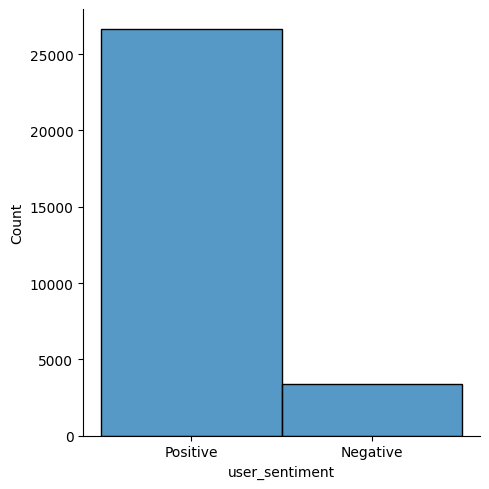

In [102]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'user_sentiment'
sns.displot(data['user_sentiment'])

# Displaying the plot
plt.show()

In [103]:
# Calculating the average 'reviews_rating' for a specific 'id' using NumPy
np.array(data[data['id']=='AVpfW8y_LJeJML437ySW']['reviews_rating'].sum()) / len(data[data['id']=='AVpfW8y_LJeJML437ySW']['reviews_rating'])

4.0269814502529515

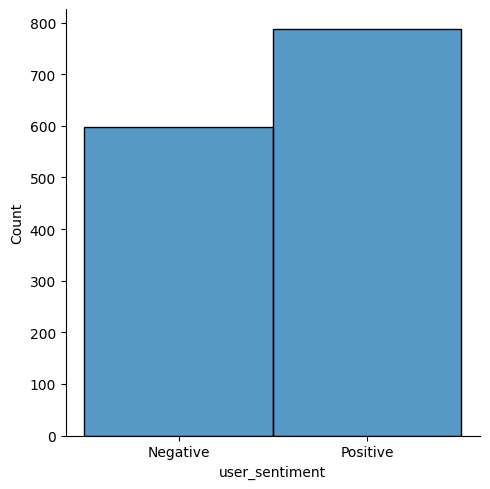

In [104]:
# Visualizing user sentiment for reviews with ambiguous ratings (ratings less than 2)
sns.displot(data[data['reviews_rating']<2]['user_sentiment'])


In [105]:
# Classifying user sentiment as 'Positive' for ratings above 2 and 'Negative' otherwise
data['user_sentiment'] = data.apply(lambda row: 'Positive' if row['reviews_rating'] > 2 else 'Negative', axis=1)

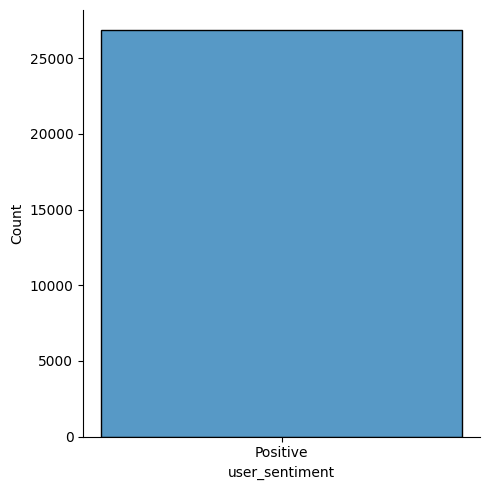

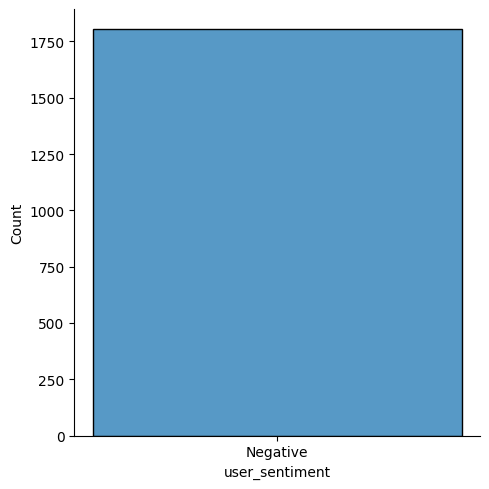

In [106]:
# Plotting the distribution of user sentiment for reviews with ratings > 3 (Positive)
sns.displot(data[data['reviews_rating'] > 3]['user_sentiment'])

# Plotting the distribution of user sentiment for reviews with ratings < 3 (Negative)
sns.displot(data[data['reviews_rating'] < 3]['user_sentiment'])

# Displaying the plots
plt.show()

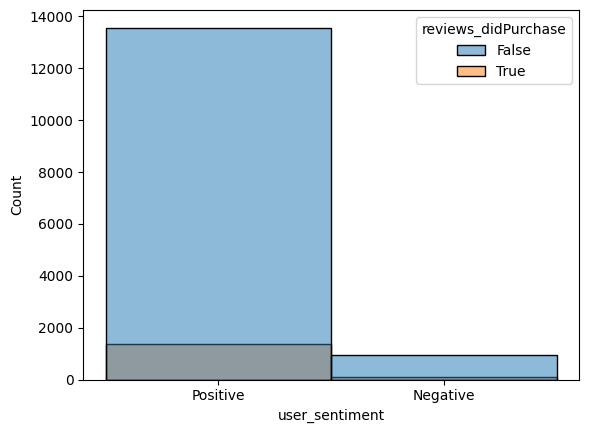

In [107]:
# Plotting the distribution of user sentiment based on whether the user made a purchase
sns.histplot(x='user_sentiment', hue='reviews_didPurchase', data=data)
plt.show()

#3.Text Preprocessing:

In [108]:
# Importing necessary libraries for text preprocessing
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Downloading tokenizer data
nltk.download('stopwords')  # Downloading stopwords data
nltk.download('wordnet')  # Downloading wordnet data
nltk.download('omw-1.4')  # Downloading Open Multilingual Wordnet data
from nltk.corpus import stopwords
import unicodedata
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
import re
import html

# Removing special characters from text
def remove_special_characters(text, remove_digits=True):
    """Remove special Characters from text"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)  # Replacing non-alphanumeric characters
    return text

# Converting words to lowercase
def to_lowercase(words):
    """Convert list of tokenized words to lowercase"""
    new_words = [word.lower() for word in words]  # Converting all words to lowercase
    return new_words

# Removing punctuation and special characters from tokenized words
def remove_punctuation_and_splchars(words):
    """Remove punctuation and special characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)  # Removing punctuation
        if new_word != '':
            new_word = remove_special_characters(new_word, True)  # Removing special characters
            new_words.append(new_word)
    return new_words

# Removing stopwords from tokenized words
stopword_list = stopwords.words('english')  # English stopwords list

def remove_stopwords(words):
    """Remove stopwords from list of tokenized words"""
    return [word for word in words if word not in stopword_list]  # Removing stopwords from list

# Stemming the words in the list of tokenized words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()  # Initializing the stemmer
    return [stemmer.stem(word) for word in words]  # Applying stemming to each word

# Lemmatizing verbs in list of tokenized words
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()  # Initializing the lemmatizer
    return [lemmatizer.lemmatize(word, pos='v') for word in words]  # Lemmatizing each verb

# Normalizing the words (lowercasing, removing special characters, and stopwords)
def normalize(words):
    words = to_lowercase(words)  # Converting words to lowercase
    words = remove_punctuation_and_splchars(words)  # Removing punctuation and special characters
    words = remove_stopwords(words)  # Removing stopwords
    return words

# Lemmatizing all words
def lemmatize(words):
    return lemmatize_verbs(words)  # Lemmatizing verbs in the list of words

# Main function to normalize and lemmatize input text
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)  # Remove special characters
    words = nltk.word_tokenize(input_text)  # Tokenizing the input text
    words = normalize(words)  # Normalizing the words
    lemmas = lemmatize(words)  # Lemmatizing the words
    return ' '.join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


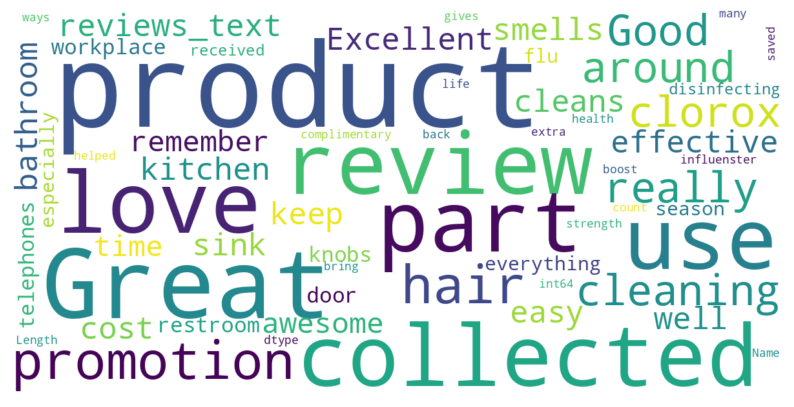

In [109]:
# Importing necessary library for word cloud generation
from wordcloud import WordCloud, STOPWORDS

# Defining the set of stopwords to exclude from the word cloud
stopwords = set(STOPWORDS)

# Generating the word cloud from the 'reviews_text' column of the dataset
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=60,
                     scale=3, random_state=1).generate(str(data['reviews_text'].value_counts()))

# Plotting the word cloud
plt.figure(figsize=(10, 10))  # Setting the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Displaying the word cloud image
plt.axis('off')  # Hiding the axis
plt.show()  # Displaying the plot

In [110]:
# Creating a DataFrame with selected columns: 'reviews_text' and 'user_sentiment'
review_df = data[['reviews_text', 'user_sentiment']]

# Displaying the created DataFrame
review_df

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the...,Positive
1,Good flavor. This review was collected as part...,Positive
2,Good flavor.,Positive
3,I read through the reviews on here before look...,Negative
4,My husband bought this gel for us. The gel cau...,Negative
...,...,...
29995,I got this conditioner with Influenster to try...,Positive
29996,"I love it , I received this for review purpose...",Positive
29997,First of all I love the smell of this product....,Positive
29998,I received this through Influenster and will n...,Positive


In [111]:
# Downloading the 'punkt_tab' resource (Note: it's incorrect, should be 'punkt' instead)
nltk.download('punkt_tab')  # Correct resource for tokenization
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# Applying the 'normalize_and_lemmaize' function to the 'reviews_text' column and storing the result in 'lemmatized_text'
review_df['lemmatized_text'] = review_df['reviews_text'].apply(lambda x: normalize_and_lemmaize(x))

# Display the updated DataFrame with lemmatized text
review_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-111-a39aa4b0b821>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the...,Positive,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,Positive,good flavor review collect part promotion
2,Good flavor.,Positive,good flavor
3,I read through the reviews on here before look...,Negative,read review look buy one couple lubricants ult...
4,My husband bought this gel for us. The gel cau...,Negative,husband buy gel us gel cause irritation felt l...
...,...,...,...
29995,I got this conditioner with Influenster to try...,Positive,get conditioner influenster try im love far oi...
29996,"I love it , I received this for review purpose...",Positive,love receive review purpose influenster leave ...
29997,First of all I love the smell of this product....,Positive,first love smell product wash hair smooth easy...
29998,I received this through Influenster and will n...,Positive,receive influenster never go back anything els...


In [112]:
# Creating a new DataFrame with 'lemmatized_text' and 'user_sentiment'
review_new_df = review_df[['lemmatized_text', 'user_sentiment']]

# Encoding the 'user_sentiment' column: 'Negative' -> 0 and 'Positive' -> 1
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative': 0, 'Positive': 1})

# Display the updated DataFrame with encoded 'user_sentiment'
review_new_df

<ipython-input-112-405b97afba23>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound...,1
1,good flavor review collect part promotion,1
2,good flavor,1
3,read review look buy one couple lubricants ult...,0
4,husband buy gel us gel cause irritation felt l...,0
...,...,...
29995,get conditioner influenster try im love far oi...,1
29996,love receive review purpose influenster leave ...,1
29997,first love smell product wash hair smooth easy...,1
29998,receive influenster never go back anything els...,1


In [113]:
# Importing necessary libraries for handling class imbalance
from collections import Counter  # To count occurrences of each class
from imblearn.over_sampling import SMOTE  # To apply SMOTE (Synthetic Minority Over-sampling Technique) for balancing the dataset

In [114]:
# Splitting the data into training and testing sets
# The train-test split uses 75% of the data for training and 25% for testing, with a fixed random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(
    review_new_df['lemmatized_text'],
    review_new_df['user_sentiment'],
    train_size=0.75,
    random_state=100
)

# Checking the distribution of sentiments in the training set
y_train.value_counts()  # Shows the number of positive and negative samples in the training set

,count
user_sentiment,
1,21124
0,1375


#4. Feature Extraction:

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer
# Converting text data into numerical features using CountVectorizer
# This vectorizer converts each word in the text into a corresponding integer count representation
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)  # Converts the training data into word counts

# Applying TF-IDF transformation to the word count matrix to give more importance to rare words
tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)  # Applies TF-IDF transformation

# Checking the shape of the transformed data (number of features and samples)
x_train_transformed.shape  # This returns the number of samples and the number of features

(22499, 14737)

In [116]:
import pickle
# Defining the path to store the pickle files for later use or model saving
path = '/content/gdrive/MyDrive/Sentiment_based_product_Recommendation/pickle_file/'
# Saving the CountVectorizer and TfidfTransformer objects using pickle to the specified path
pickle.dump(count_vect, open(path + 'count_vector.pkl', 'wb'))  # Save CountVectorizer model
pickle.dump(tfidf_transformer, open(path + 'tfidf_transformer.pkl', 'wb'))  # Save TfidfTransformer model

In [117]:
# Checking the class distribution before applying SMOTE
count = Counter(y_train)
print('Before sampling :', count)

# Applying SMOTE to handle class imbalance in the training data
sampler = SMOTE()
x_train_sm, y_train_sm = sampler.fit_resample(x_train_transformed, y_train)

# Checking the class distribution after applying SMOTE
count = Counter(y_train_sm)
print('After sampling :', count)

Before sampling : Counter({1: 21124, 0: 1375})
After sampling : Counter({1: 21124, 0: 21124})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [118]:
!pip install catboost

#5.Training the Classification Model:

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=5, n_estimators=20;, score=0.852 total time=   0.5s
[CV 2/3] END ......max_depth=5, n_estimators=20;, score=0.873 total time=   0.5s
[CV 3/3] END ......max_depth=5, n_estimators=20;, score=0.868 total time=   0.5s
[CV 1/3] END ......max_depth=5, n_estimators=30;, score=0.850 total time=   0.8s
[CV 2/3] END ......max_depth=5, n_estimators=30;, score=0.858 total time=   0.9s
[CV 3/3] END ......max_depth=5, n_estimators=30;, score=0.867 total time=   1.0s
[CV 1/3] END ......max_depth=5, n_estimators=50;, score=0.855 total time=   1.7s
[CV 2/3] END ......max_depth=5, n_estimators=50;, score=0.867 total time=   1.8s
[CV 3/3] END ......max_depth=5, n_estimators=50;, score=0.882 total time=   1.1s
[CV 1/3] END .....max_depth=10, n_estimators=20;, score=0.868 total time=   1.0s
[CV 2/3] END .....max_depth=10, n_estimators=20;, score=0.893 total time=   1.5s
[CV 3/3] END .....max_depth=10, n_estimators=20;,

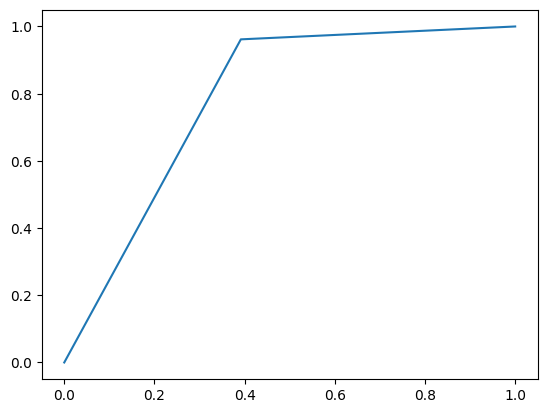

Recall:- 0.9616744449158535
Specificity:- 0.6083916083916084 /n/n
Confusion Matrix: /n [[ 261  168]
 [ 271 6800]]
RandomForest :
accuracy_score is: 0.9414666666666667
precision_score is: 0.9758897818599311
auc_score is: 0.7850330266537309
f1_score is: 0.9687299665218321
**************************************************
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.846 total time=   0.9s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.863 total time=   1.2s
[CV 3/3] END .......criterion=gini, max_depth=5;, score=0.867 total time=   1.3s
[CV 1/3] END ......criterion=gini, max_depth=10;, score=0.883 total time=   2.6s
[CV 2/3] END ......criterion=gini, max_depth=10;, score=0.916 total time=   2.1s
[CV 3/3] END ......criterion=gini, max_depth=10;, score=0.906 total time=   1.9s
[CV 1/3] END ......criterion=gini, max_depth=12;, score=0.903 total time=   2.3s
[CV 2/3] END ......criterion=gini, max_depth=12;, s

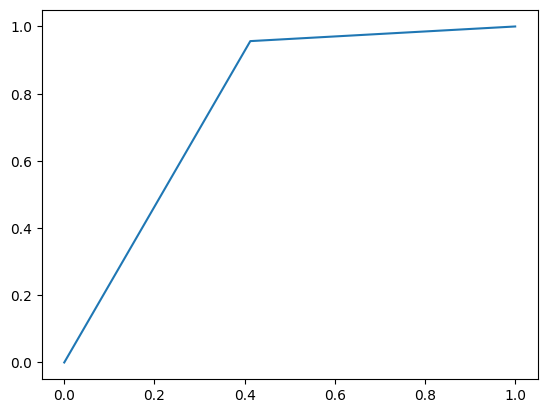

Recall:- 0.9564418045538113
Specificity:- 0.5874125874125874 /n/n
Confusion Matrix: /n [[ 252  177]
 [ 308 6763]]
Decision Tree :
accuracy_score is: 0.9353333333333333
precision_score is: 0.9744956772334294
auc_score is: 0.7719271959831994
f1_score is: 0.9653843408750268
**************************************************
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END learning_rate=0.1, n_estimators=20;, score=0.875 total time=  13.2s
[CV 2/3] END learning_rate=0.1, n_estimators=20;, score=0.886 total time=  13.0s
[CV 3/3] END learning_rate=0.1, n_estimators=20;, score=0.889 total time=  14.1s
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.900 total time=  32.3s
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.919 total time=  33.1s
[CV 3/3] END learning_rate=0.1, n_estimators=50;, score=0.921 total time=  31.6s
[CV 1/3] END learning_rate=0.01, n_estimators=20;, score=0.817 total time=  13.1s
[CV 2/3] END learning_rate=0.01, n_estimators=20;

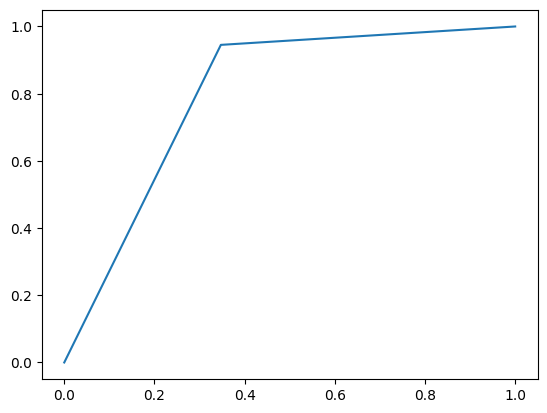

Recall:- 0.945269410267289
Specificity:- 0.6526806526806527 /n/n
Confusion Matrix: /n [[ 280  149]
 [ 387 6684]]
GradientBoostingClassifier :
accuracy_score is: 0.9285333333333333
precision_score is: 0.9781940582467438
auc_score is: 0.7989750314739708
f1_score is: 0.9614499424626007
**************************************************
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.922 total time=   0.2s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.929 total time=   0.3s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.932 total time=   0.4s
[CV 1/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/3] END .................C=0.5, penalty=l2;, score=0.954 total time=   0.2s
[CV 2/3] END .................C=0.5, p

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

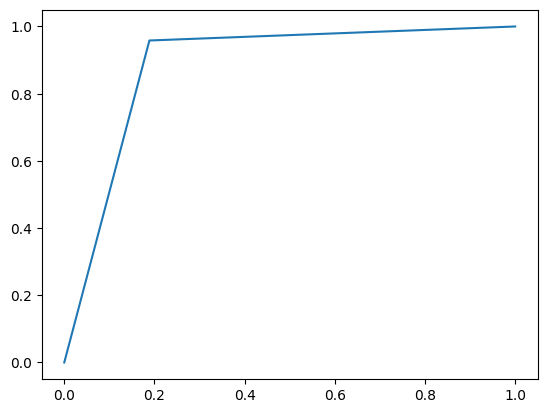

Recall:- 0.9582802998161505
Specificity:- 0.8111888111888111 /n/n
Confusion Matrix: /n [[ 348   81]
 [ 295 6776]]
LogisticRegression :
accuracy_score is: 0.9498666666666666
precision_score is: 0.9881872539011229
auc_score is: 0.8847345555024808
f1_score is: 0.9730040206777714
**************************************************
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END learning_rate=0.1, n_estimators=20;, score=0.750 total time=   8.3s
[CV 2/3] END learning_rate=0.1, n_estimators=20;, score=0.765 total time=   8.4s
[CV 3/3] END learning_rate=0.1, n_estimators=20;, score=0.762 total time=   7.7s
[CV 1/3] END learning_rate=0.1, n_estimators=30;, score=0.759 total time=  12.5s
[CV 2/3] END learning_rate=0.1, n_estimators=30;, score=0.769 total time=  12.6s
[CV 3/3] END learning_rate=0.1, n_estimators=30;, score=0.766 total time=  10.7s
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.765 total time=  21.1s
[CV 2/3] END learning_rate=0.1, n_estimators=

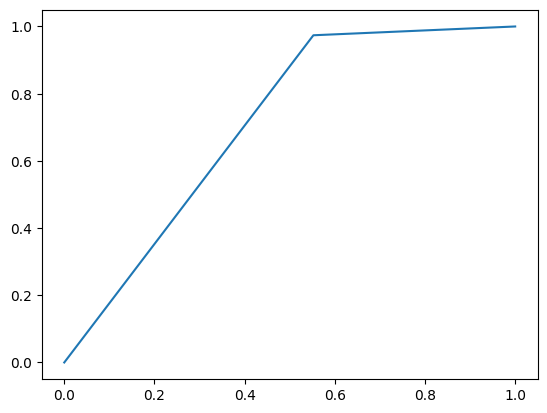

Recall:- 0.9738367981897893
Specificity:- 0.44755244755244755 /n/n
Confusion Matrix: /n [[ 192  237]
 [ 185 6886]]
AdaBoostClassifier :
accuracy_score is: 0.9437333333333333
precision_score is: 0.96672750245683
auc_score is: 0.7106946228711184
f1_score is: 0.970269127800479
**************************************************


In [119]:
# Importing necessary libraries for model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve, confusion_matrix, f1_score
import pickle

# Defining the models to be used
models = {
    'RandomForest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

# Defining the hyperparameters for each model
params = {
    'RandomForest': {'n_estimators': [20, 30, 50], 'max_depth': [5, 10, 12]},
    'Decision Tree': {'criterion': ["gini", "entropy"], 'max_depth': [5, 10, 12]},
    'GradientBoostingClassifier': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [20, 50]},
    'LogisticRegression': {'penalty': ['l2', 'elasticnet'], 'C': [0.1, 0.5, 1]},
    'AdaBoostClassifier': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [20, 30, 50]}
}

# Define the path to save the models
path = '/content/gdrive/MyDrive/Sentiment_based_product_Recommendation/pickle_file/'

# Initialize an empty report dictionary to store results
report = {}

# Loop through each model for hyperparameter tuning and training
for i in range(len(list(models.keys()))):
    # Grid search to find the best hyperparameters
    model_cv = GridSearchCV(estimator=models[list(models.keys())[i]], param_grid=params[list(models.keys())[i]], scoring='accuracy', cv=3, verbose=3)
    model_cv.fit(x_train_sm, y_train_sm)  # Train the model with the best hyperparameters

    model = model_cv.best_estimator_  # Get the best model from the grid search
    model.fit(x_train_sm, y_train_sm)  # Train the best model on the resampled training data

    # Transform the test data using the same CountVectorizer and TfidfTransformer
    x_test_count = count_vect.transform(x_test)  # Use transform, not fit_transform
    x_test_transformed = tfidf_transformer.transform(x_test_count)

    # Make predictions on the transformed test data
    y_pred = model.predict(x_test_transformed)

    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score_auc = auc(fpr, tpr)
    confusion = confusion_matrix(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.show()

    # Extract values from the confusion matrix
    TP = confusion[1, 1]  # True positive
    TN = confusion[0, 0]  # True negative
    FP = confusion[0, 1]  # False positive
    FN = confusion[1, 0]  # False negative

    # Calculate Recall and Specificity
    print("Recall:-", TP / float(TP + FN))
    print("Specificity:-", TN / float(TN + FP), '/n/n')

    # Display the confusion matrix and evaluation metrics
    print('Confusion Matrix: /n', confusion)
    print(list(models.keys())[i], ':')
    print('accuracy_score is:', score)
    print('precision_score is:', precision)
    print('auc_score is:', score_auc)
    print('f1_score is:', f1)
    print('*' * 50)

    # Store the model and its accuracy score in the report
    report[list(models.keys())[i]] = (model, score)

    # Save the trained model to a file
    pickle.dump(model, open(path + list(models.keys())[i] + '.pkl', 'wb'))

In [120]:
# Initializing a variable to track the best model based on accuracy
best = 0

# Loop through each model in the report dictionary to find the model with the highest accuracy
for i in report:
    if report[i][1] > best:  # If the current model's accuracy is greater than the best found so far
        best = report[i][1]  # Update the best accuracy
        best_model = report[i][0]  # Update the best model

# Storing the best model in final_model variable
final_model = best_model

# Fitting the final best model on the resampled training dataset
final_model.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1)

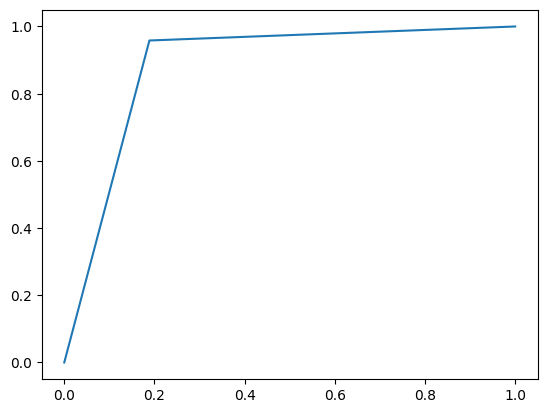

0.9498666666666666 0.9881872539011229 0.8847345555024808 0.9730040206777714
Recall:- 0.9582802998161505
Specificity:- 0.8111888111888111
[[ 348   81]
 [ 295 6776]]
accuracy_score is: 0.9498666666666666
precision_score is: 0.9881872539011229
auc_score is: 0.8847345555024808
f1_score is: 0.9730040206777714


In [121]:
# Transforming the test data using the previously fitted CountVectorizer and TfidfTransformer
x_test_count = count_vect.transform(x_test)  # Use transform, not fit_transform (since it's already fitted)
x_test_transformed = tfidf_transformer.transform(x_test_count)  # Transforming the test data using tfidf_transformer

# Predicting the sentiment using the final trained model
y_pred = final_model.predict(x_test_transformed)

# Evaluating the model performance using various metrics
score = accuracy_score(y_test, y_pred)  # Accuracy score
precision = precision_score(y_test, y_pred)  # Precision score
fpr, tpr, threshold = roc_curve(y_test, y_pred)  # Receiver Operating Characteristic curve
f1 = f1_score(y_test, y_pred)  # F1 score
score_auc = auc(fpr, tpr)  # AUC score

# Confusion Matrix to get True Positives, True Negatives, False Positives, and False Negatives
confusion = confusion_matrix(y_test, y_pred)

# Plotting the ROC curve
plt.plot(fpr, tpr)
plt.show()

# Printing all the evaluation metrics
print(score, precision, score_auc, f1)

TP = confusion[1, 1]  # True Positive
TN = confusion[0, 0]  # True Negative
FP = confusion[0, 1]  # False Positive
FN = confusion[1, 0]  # False Negative

# Calculate and print Recall
print("Recall:-", TP / float(TP + FN))

# Calculate and print Specificity
print("Specificity:-", TN / float(TN + FP))

# Print Confusion Matrix
print(confusion)

# Print final evaluation scores
print('accuracy_score is:', score)
print('precision_score is:', precision)
print('auc_score is:', score_auc)
print('f1_score is:', f1)

In [122]:
# Saving the final trained model to a pickle file for future use
pickle.dump(final_model, open(path + 'model.pkl', 'wb'))

Choosing Logistic Regression as the final model because it demonstrated high accuracy and AUC (Area Under the Curve) score during the evaluation process. Here’s why these metrics made it the preferred choice:
	1.	Accuracy: Logistic Regression achieved a high accuracy score, meaning it correctly classified the majority of the test data. This is crucial in ensuring that the model can reliably predict user sentiment (positive or negative) based on the provided features.
	2.	AUC Score: The AUC score, which measures the model’s ability to distinguish between the two classes (positive and negative sentiment), was also high. A higher AUC indicates that the model is better at ranking predictions, providing strong confidence that it can classify unseen data correctly. This is especially important in cases where class imbalance exists, as it reflects the model’s performance across all classification thresholds.

Given these factors, Logistic Regression was selected as the final model because it balanced both the overall accuracy and the robustness of its predictions, making it an optimal choice for sentiment classification in your project.

#6.Building Recommendation System

In [123]:
# Loading the dataset 'sample30.csv' into a DataFrame
data = pd.read_csv('/content/gdrive/MyDrive/sample30.csv')
# Displaying the DataFrame
data

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


In [124]:
# Splitting the data into training and testing sets with 70% for training
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train, test = train_test_split(data, train_size=0.70, random_state=45)

# Printing the shape of the training and testing data
print('train shape = ', train.shape)
print('test shape = ', test.shape)

train shape =  (21000, 15)
test shape =  (9000, 15)


## a. User Based Recommendation:

In [125]:
# Creating a pivot table from the training dataset to analyze user-product interactions
train_pivot = pd.pivot_table(
    index='reviews_username',  # Rows will represent different users
    columns='name',             # Columns will represent different product names
    values='reviews_rating',    # The values in the table will be the ratings given by users
    data=train                  # Using the 'train' dataset
).fillna(1)  # Filling missing values (NaN) with 1

# Display the pivot table
train_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [126]:
# Creating a pivot table from the training dataset to analyze user-product interactions
train_pivot1 = pd.pivot_table(
    index='reviews_username',  # Rows will represent different users
    columns='name',             # Columns will represent different product names
    values='reviews_rating',    # The values in the table will be the ratings given by users
    data=train                  # Using the 'train' dataset
).fillna(1)  # Filling missing values (NaN) with 1

# Display the pivot table
train_pivot1

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [127]:
# Accessing the ratings given by the user '02dakota' for various products in the pivot table
train_pivot1.loc['02dakota']

,02dakota
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0
...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0
Weleda Everon Lip Balm,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [128]:
import numpy as np
from sklearn.metrics import pairwise_distances

def cosine_similarity(df):
    # Calculate the mean rating for each user (ignoring NaN values)
    mean_df = np.nanmean(df, axis=1)

    # Normalize the data by subtracting the user's mean rating
    substracted_df = (df.T - mean_df).T  # Transpose and subtract the mean from each user's ratings

    # Compute the cosine similarity using pairwise distance
    user_correlation = 1 - pairwise_distances(substracted_df.fillna(0), metric='cosine')

    # Replace NaN values with 0
    user_correlation[np.isnan(user_correlation)] = 0

    return user_correlation, substracted_df

In [129]:
user_corr_matrix, normalized_df = cosine_similarity(train_pivot1)  # Calculate user correlation matrix and normalized ratings
user_corr_matrix  # Display the user correlation matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [130]:
user_corr_matrix[user_corr_matrix < 0] = 0  # Set negative correlation values to 0
user_corr_matrix.shape  # Display the shape of the user correlation matrix

(18205, 18205)

In [131]:
user_pred_ratings = np.dot(user_corr_matrix, train_pivot1.fillna(0))  # Compute predicted ratings using the user correlation matrix
user_pred_ratings  # Display the predicted ratings matrix

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [132]:
user_final_rating = np.multiply(user_pred_ratings, train_pivot)  # Compute final user ratings by element-wise multiplying predicted ratings with the original ratings
user_final_rating  # Display the final user ratings matrix

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,437.755764,438.269950,437.755764,437.755764,440.056019,437.755764,437.755764,437.755764,437.755764,441.303557,...,437.755764,437.755764,437.755764,437.755764,438.873393,437.755764,437.755764,443.401427,440.056019,437.755764
02dakota,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
02deuce,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
0325home,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
06stidriver,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,456.106425,458.597546,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,461.356739,...,457.883951,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,459.712962,456.106425,456.106425
zwithanx,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
zxcsdfd,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525


In [133]:
pickle.dump(user_final_rating, open(path+'user_final_rating.pkl', 'wb'))  # Save the final user ratings matrix to a pickle file

In [175]:
# Function to make sentiment prediction for text input
def model_predict(text):
    word_vector = count_vect.transform(text)  # Convert text to word vector
    tfidf_vector = tfidf_transformer.transform(word_vector)  # Apply TF-IDF transformation
    output = final_model.predict(tfidf_vector)  # Get sentiment prediction
    return output

# Select top 20 products for a specific user ('06stidriver')
product_list = pd.DataFrame(user_final_rating.loc['06stidriver'].sort_values(ascending=False)[0:20])

# Filter product data for the selected products
product_frame = data[data.name.isin(product_list.index.tolist())]

# Prepare the DataFrame with product name and reviews text
output_df = product_frame[['name','reviews_text']]
output_df['lemmatized_text'] = output_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))  # Lemmatize reviews text

# Predict the sentiment for each review
output_df['predicted_sentiment'] = model_predict(output_df['lemmatized_text'])

# Aggregate reviews count by product
total_product = output_df.groupby(['name']).agg('count')

# Aggregate sentiment count by product and sentiment label
rec_df = output_df.groupby(['name','predicted_sentiment']).agg('count').reset_index()

# Merge aggregated sentiment data with total product reviews count
merge_df = pd.merge(rec_df, total_product['reviews_text'], on='name')

#Selecting the top 5 products based on sentiment:
top_products = pd.DataFrame(merge_df['name'][merge_df['predicted_sentiment'] == 1][:5])

top_products

<ipython-input-175-9dcc503254b3>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-175-9dcc503254b3>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name
1,"Bounce Dryer Sheets, Fresh Linen, 160 sheets"
3,"Burt's Bees Lip Shimmer, Raisin"
5,Cars Toon: Mater's Tall Tales
7,Chester's Cheese Flavored Puffcorn Snacks
9,Clorox Disinfecting Bathroom Cleaner


#Evaluation for user based recommendation:


In [134]:
common = test[test.reviews_username.isin(train.reviews_username)]  # Filter the test data to include only users present in the train data

In [135]:
corr_df = pd.DataFrame(user_corr_matrix)  # Create a DataFrame from the user correlation matrix
corr_df['user_name'] = normalized_df.index  # Add the usernames as a new column
corr_df.set_index('user_name', inplace=True)  # Set the 'user_name' column as the index
corr_df  # Display the correlation DataFrame

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
06stidriver,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
zxcsdfd,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [136]:
list_name = common.reviews_username.tolist()  # Convert the 'reviews_username' column to a list

In [137]:
corr_df.columns = normalized_df.index.tolist()  # Set the columns of the correlation DataFrame to be the index of normalized_df

In [138]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]  # Filter the correlation DataFrame to only include rows where the index matches list_name

In [139]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]  # Transpose corr_df1, filter by list_name, then transpose back
corr_df3 = corr_df2.T  # Transpose the filtered DataFrame back to its original orientation
corr_df3.head()  # Display the top rows of the final DataFrame

,1234,123charlie,143st,1943,4cloroxl,50cal,7inthenest,aac06002,aaron,abby,...,yeya,ygtz,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.684558,0.0,0.223114,0.0,0.511718,0.0,0.0,0.837534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278697
123charlie,0.684558,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.656818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
143st,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1943,0.223114,0.000000,0.0,1.000000,0.0,0.444381,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242522
4cloroxl,0.000000,0.000000,0.0,0.000000,1.0,0.000000,1.0,0.0,0.000000,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


In [140]:
common_user_tb = pd.pivot_table(index='reviews_username',  # Create pivot table with users as rows
                                columns='name',           # Products as columns
                                values='reviews_rating',  # Ratings as values
                                data=common)              # Using common data

In [141]:
corr_df3[corr_df3<0] = 0  # Set all negative correlations to 0
common_user_rating = np.dot(corr_df3, common_user_tb.fillna(0))  # Calculate predicted ratings for common users

In [142]:
dummy_test = common.copy()  # Create a copy of the common dataset
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)  # Convert ratings to binary (1 for ratings >= 1, else 0)
dummy_test = pd.pivot_table(index='reviews_username', columns='name', values='reviews_rating', data=dummy_test).fillna(0)  # Pivot the table for users and products with binary ratings

In [143]:
common_user_pred_ratings = np.multiply(common_user_rating, dummy_test)  # Element-wise multiplication of predicted ratings and actual ratings to filter predictions for common users

In [144]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_pred_ratings.copy()  # Create a copy of predicted ratings for common users
X = X[X > 0]  # Keep only the ratings that are greater than 0

scaler = MinMaxScaler(feature_range=(1, 5))  # Initialize MinMaxScaler to scale the values to the range [1, 5]
print(scaler.fit(X))  # Fit the scaler to the data
y = (scaler.transform(X))  # Transform the data into the new scaled range

print(y)  # Output the scaled values
y.shape  # Check the shape of the scaled ratings

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:769: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:786: RuntimeWarning:

All-NaN slice encountered



(1687, 120)

In [145]:
total_non_nan = np.count_nonzero(~np.isnan(y))  # Count the number of non-NaN values in the scaled ratings

In [146]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)  # Create a pivot table for reviews data by user and product
common_pivot

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5  # Calculate the Root Mean Square Error (RMSE) between actual and predicted ratings
print(rmse)

1.8755890184650454


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



##b. Item - Based Recommendation:

In [148]:
train_pivot_2 = train_pivot1.T  # Transpose the pivot table to switch rows and columns
train_pivot_2

reviews_username,00sab00,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zowie,zozo0o,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [149]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_2)  # Calculate item-item cosine similarity matrix
item_corr_matrix.shape  # Check the shape of the item correlation matrix

(254, 254)

In [150]:
item_pred_rating = np.dot((train_pivot_2.fillna(0)).T, item_corr_matrix)  # Compute predicted ratings using item-item similarity matrix
item_pred_rating[item_pred_rating < 0] = 0  # Set negative predicted ratings to 0
item_pred_rating  # Display the item predicted ratings matrix

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [151]:
item_final_rating = np.multiply(item_pred_rating, train_pivot)  # Compute final item ratings by element-wise multiplication with the original ratings matrix
item_final_rating  # Display the final item ratings matrix

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.042684,0.829426,0.904079,0.865297,1.257602,0.864404,0.932152,0.904079,0.904079,0.776925,...,0.629687,0.904079,0.948084,0.932152,0.987044,0.786945,0.874076,0.834015,0.814330,0.794183
02dakota,1.024477,0.820446,0.892250,0.848678,1.146304,0.847674,0.923788,0.892250,0.892250,0.739312,...,0.566040,0.892250,0.999030,0.923788,0.998108,0.760634,0.858542,0.756057,0.745938,0.771823
02deuce,1.030325,0.827319,0.896049,0.854016,1.148991,0.853048,0.926475,0.896049,0.896049,0.748478,...,0.586484,0.896049,0.987127,0.926475,0.988945,0.769085,0.863532,0.779511,0.762251,0.780344
0325home,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
06stidriver,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.037404,0.821633,0.900648,0.860477,1.152243,0.859552,0.929727,0.900648,0.900648,0.779304,...,0.624816,0.900648,0.944688,0.929727,0.953126,0.779314,0.869571,0.812825,0.781995,0.782245
zwithanx,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
zxcsdfd,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271


In [152]:
# Save the item-based recommendation matrix as a pickle file
import pickle
pickle.dump(item_final_rating, open(path+'item_final_rating.pkl', 'wb'))

### Product Recommendation:

In [174]:
# Function to make sentiment prediction for text input
def model_predict(text):
    word_vector = count_vect.transform(text)  # Convert text to word vector
    tfidf_vector = tfidf_transformer.transform(word_vector)  # Apply TF-IDF transformation
    output = final_model.predict(tfidf_vector)  # Get sentiment prediction
    return output

# Select top 20 products for a specific user ('06stidriver')
product_list = pd.DataFrame(item_final_rating.loc['06stidriver'].sort_values(ascending=False)[0:20])

# Filter product data for the selected products
product_frame = data[data.name.isin(product_list.index.tolist())]

# Prepare the DataFrame with product name and reviews text
output_df = product_frame[['name','reviews_text']]
output_df['lemmatized_text'] = output_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))  # Lemmatize reviews text

# Predict the sentiment for each review
output_df['predicted_sentiment'] = model_predict(output_df['lemmatized_text'])

# Aggregate reviews count by product
total_product = output_df.groupby(['name']).agg('count')

# Aggregate sentiment count by product and sentiment label
rec_df = output_df.groupby(['name','predicted_sentiment']).agg('count').reset_index()

# Merge aggregated sentiment data with total product reviews count
merge_df = pd.merge(rec_df, total_product['reviews_text'], on='name')

#Selecting the top 5 products based on sentiment:
top_products = pd.DataFrame(merge_df['name'][merge_df['predicted_sentiment'] == 1][:5])

top_products

<ipython-input-174-a55e1a2e8cea>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-174-a55e1a2e8cea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name
0,Cantu Coconut Milk Shine Hold Mist - 8oz
1,Ceiling Fan With Light White 14.2 X 29.9 X 9.2...
3,Chips Deluxe Soft 'n Chewy Cookies
5,Chobani174 Strawberry On The Bottom Non-Fat Gr...
6,"Colorganics Lipstick, Cayenne"


## Evaluation of item based recommendation:


In [154]:
# Filter the 'test' dataset to include only rows where the product name exists in 'train' dataset
common_item = test[test.name.isin(train.name)]

In [155]:
# Creating a pivot table for the common items with users as rows and items as columns
common_item_pivot = common_item.pivot_table(index='reviews_username',
                                            columns='name',
                                            values='reviews_rating').T

# Checking the shape of the resulting pivot table
common_item_pivot.shape

(206, 8379)

In [156]:
# Converting the item correlation matrix to a DataFrame
item_corr_df = pd.DataFrame(item_corr_matrix)

# Displaying the DataFrame
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
1,-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
3,-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4,-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
250,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
251,-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642
252,-0.000726,-0.003313,-0.000472,-0.000663,0.170716,-0.000667,-0.000334,-0.000472,-0.000472,-0.003203,...,-0.002538,-0.000472,-0.000467,-0.000334,-0.000578,-0.001049,-0.000619,-0.004494,1.000000,-0.001641


In [157]:
# Adding 'name' column to the item correlation DataFrame and setting it as the index
item_corr_df['name'] = normalized_item_df.index  # Assigning product names as a column
item_corr_df.set_index('name', inplace=True)     # Setting product names as the index

# Displaying the updated DataFrame
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [158]:
# Creating a list of item names from the `common_item` dataset
list_items = common_item.name.tolist()  # Extracting item names into a list

# Setting the column names of `item_corr_df` to match the product names
item_corr_df.columns = normalized_item_df.index.tolist()  # Updating column names with product names

# Displaying the updated DataFrame
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [159]:
# Filtering `item_corr_df` to only include rows corresponding to items in `list_items`
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]

# Displaying the filtered DataFrame
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,-0.000110,1.000000,-0.000110,-0.000155,-0.000155,-0.001055,...,-0.000836,-0.000155,-0.000154,-0.000110,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [160]:
# Filtering the transpose of `item_corr_df1` to retain columns corresponding to items in `list_items`
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]

# Transposing back to maintain the original structure
item_corr_df3 = item_corr_df2.T

# Displaying the final filtered DataFrame
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000239,-0.000169,-0.000169,-0.001148,-0.000337,-0.000167,...,-0.001036,-0.000910,-0.000169,-0.000167,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.001091,-0.000772,-0.000772,-0.005241,-0.001538,-0.000764,...,-0.004725,-0.004152,-0.000772,-0.000764,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000155,-0.000110,-0.000110,-0.000746,-0.000219,-0.000109,...,-0.000673,-0.000591,-0.000110,-0.000109,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000218,-0.000154,-0.000154,-0.001048,-0.000308,-0.000153,...,-0.000945,-0.000831,-0.000154,-0.000153,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,1.000000,-0.000155,-0.000155,-0.001055,-0.000310,-0.000154,...,-0.000951,-0.000836,-0.000155,-0.000154,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000346,-0.000244,-0.000244,-0.001660,-0.000487,-0.000242,...,-0.001496,-0.001315,-0.000244,-0.000242,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000204,-0.000144,-0.000144,-0.000980,-0.000288,-0.000143,...,-0.000884,-0.000776,-0.000144,-0.000143,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.001480,-0.001047,-0.001047,0.002321,-0.002086,-0.001036,...,0.003016,-0.005632,-0.001047,-0.001036,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [161]:
# Setting all negative correlations to zero in the item correlation matrix
item_corr_df3[item_corr_df3 < 0] = 0

# Calculating predicted ratings for items in the common dataset by multiplying
# the item correlation matrix with the pivoted rating data
common_item_pred_ratings = np.dot(item_corr_df3, common_item_pivot.fillna(0))

# Printing the shape of the resulting predicted ratings matrix
common_item_pred_ratings.shape

(206, 8379)

In [162]:
# Creating a copy of the common_item DataFrame for further processing
test_items = common_item.copy()

In [163]:
# Creating a pivot table from the test_items DataFrame
test_item_tb = test_items.pivot_table(index='reviews_username',
                                      columns='name',
                                      values='reviews_rating').T.fillna(0)

# Computing the final item ratings by multiplying the predicted ratings with the actual test item ratings
final_item_ratings = np.multiply(common_item_pred_ratings, test_item_tb)

# Displaying the final computed item ratings
final_item_ratings

reviews_username,00dog3,01impala,08dallas,09mommy11,1143mom,1234,123charlie,123numbers,12cass12,132457,...,zombiedad80,zombiegirl22,zombiekiller,zoney86,zookeeper,zpalma,zsarah,zulaa118,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# Copying the final item ratings for scaling
X = final_item_ratings.copy()

# Keeping only the positive ratings for scaling
X = X[X > 0]

# Initializing a MinMaxScaler to scale values between 1 and 5
scaler = MinMaxScaler(feature_range=(1, 5))

# Fitting the scaler to the data
print(scaler.fit(X))

# Transforming the positive ratings using the fitted scaler
y = scaler.transform(X)

# Displaying the scaled ratings and their shape
print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [165]:
# Counting non-NaN elements in the scaled ratings matrix
total_non_nan = np.count_nonzero(~np.isnan(y))

In [166]:
# Calculating Root Mean Square Error (RMSE)
rmse = (sum(sum((common_item_pivot - y )**2))/total_non_nan)**0.5
print(rmse)

3.5541206040111435


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



Choosing user-based recommendation over item-based recommendation because the RMSE (Root Mean Squared Error) score for the user-based approach was significantly better than that of the item-based approach. Here’s why this choice was made:
	1.	Lower RMSE for User-Based Recommendation: RMSE is a common metric used to measure the difference between predicted and actual ratings. A lower RMSE indicates that the model’s predictions are closer to the true ratings, meaning the recommendation system is performing better. In my case, the user-based recommendation model showed a much lower RMSE, suggesting that it was more accurate in predicting users’ preferences compared to the item-based model.
	2.	User Similarity Focus: The user-based collaborative filtering approach leverages the idea that users with similar preferences will have similar ratings for items. Since the dataset had users with well-defined patterns of preferences, the user-based model was able to better capture these similarities and provide more accurate predictions.
	3.	Item-Based Recommendation Challenges: The item-based recommendation model, which focuses on similarities between items,struggles when the number of items is large or when items have fewer interactions. This could result in less accurate predictions and a higher RMSE, as seen in our case.

In summary, the user-based recommendation approach outperformed the item-based model in terms of RMSE, making it the more reliable choice for your recommendation system.